드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd "/content/drive/My Drive/donga-bigdata/2_Machine_learning/Decision tree"

-----

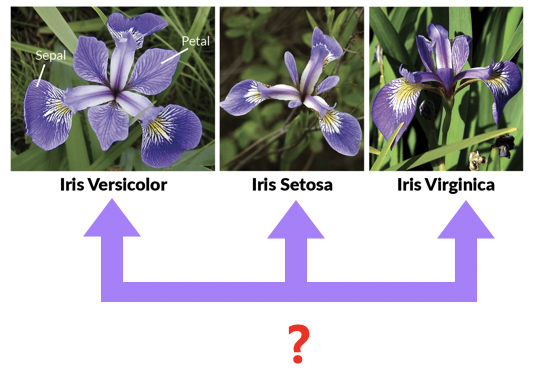

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from subprocess import check_call
import matplotlib.pyplot  as plt

In [ ]:
iris = load_iris()
x = iris.data[:,2:] # 꽃잎의 길이, 너비
y = iris.target

In [ ]:
#print(iris.feature_names)
print(iris.DESCR)

In [ ]:
species = iris.target_names
print(species)

In [ ]:
for sp in range(3):
  plot_data = x[y==sp]
  plt.scatter(plot_data[:,0],plot_data[:,1], label=species[sp], alpha=0.5)
plt.title('iris')
plt.xlim(x[:,0].min()-0.1,x[:,0].max()+0.1)
plt.ylim(x[:,1].min()-0.1,x[:,1].max()+0.1)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.savefig('./output/iris_scatter.png')

In [ ]:
# decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 3
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(x,y)

export_graphviz(
    tree_model, # 학습한 모형
    out_file = './output/iris_tree_model.dot', # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    class_names = iris.target_names, # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','./output/iris_tree_model.dot','-o','./output/iris_tree_model.png'])

In [ ]:
# max_depth = 3
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(x,y)

export_graphviz(
    tree_model, # 학습한 모형
    out_file = './output/iris_tree_model_reg.dot', # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)

# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','./output/iris_tree_model_reg.dot','-o','./output/iris_tree_model_reg.png'])